In [1]:
library(ROCR)
library(dplyr)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
survey <- read.csv('전처리/survey.csv')

In [3]:
str(survey)
head(survey)

'data.frame':	213 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 1 1 1 2 1 2 1 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 30 30 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 2 1 1 1 2 1 1 1 2 2 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 2 1 1 2 1 2 1 2 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 1 1 1 2 1 1 ...
 $ interest   : int  5 5 3 3 5 5 3 3 4 3 ...
 $ comp       : int  4 1 2 3 5 5 5 2 3 3 ...
 $ triangle1  : int  5 1 4 4 5 5 5 4 2 5 ...
 $ triangle2  : int  2 2 1 3 4 4 2 3 2 3 ...
 $ doubleness1: int  3 2 2 2 1 2 5 4 5 2 ...
 $ doubleness2: int  2 3 1 2 2 2 4 3 4 3 ...
 $ doubleness3: int  2 2 2 1 3 1 5 1 5 5 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,bright,bright,clothes,3,3,4,3,2,2,1
4,Male,20,harmony,harmony,clothes,5,5,5,4,1,2,3
5,Female,20,bright,bright,clothes,5,5,5,4,2,2,1


In [4]:
survey$comp1 <- case_when(
    survey$comp == 1 ~ 1,
    survey$comp != 1 ~ 0)

survey$comp2 <- case_when(
    survey$comp == 2 ~ 1,
    survey$comp != 2 ~ 0)

survey$comp3 <- case_when(
    survey$comp == 3 ~ 1,
    survey$comp != 3 ~ 0)

survey$comp4 <- case_when(
    survey$comp == 4 ~ 1,
    survey$comp != 4 ~ 0)

survey$comp5 <- case_when(
    survey$comp == 5 ~ 1,
    survey$comp != 5 ~ 0)

survey$t1_1 <- case_when(
    survey$triangle1 == 1 ~ 1,
    survey$triangle1 != 1 ~ 0)

survey$t1_2 <- case_when(
    survey$triangle1 == 2 ~ 1,
    survey$triangle1 != 2 ~ 0)

survey$t1_3 <- case_when(
    survey$triangle1 == 3 ~ 1,
    survey$triangle1 != 3 ~ 0)

survey$t1_4 <- case_when(
    survey$triangle1 == 4 ~ 1,
    survey$triangle1 != 4 ~ 0)

survey$t1_5 <- case_when(
    survey$triangle1 == 5 ~ 1,
    survey$triangle1 != 5 ~ 0)
	
survey$t2_1 <- case_when(
    survey$triangle2 == 1 ~ 1,
    survey$triangle2 != 1 ~ 0)

survey$t2_2 <- case_when(
    survey$triangle2 == 2 ~ 1,
    survey$triangle2 != 2 ~ 0)

survey$t2_3 <- case_when(
    survey$triangle2 == 3 ~ 1,
    survey$triangle2 != 3 ~ 0)

survey$t2_4 <- case_when(
    survey$triangle2 == 4 ~ 1,
    survey$triangle2 != 4 ~ 0)

survey$t2_5 <- case_when(
    survey$triangle2 == 5 ~ 1,
    survey$triangle2 != 5 ~ 0)
	
survey$d1_1 <- case_when(
    survey$doubleness1 == 1 ~ 1,
    survey$doubleness1 != 1 ~ 0)

survey$d1_2 <- case_when(
    survey$doubleness1 == 2 ~ 1,
    survey$doubleness1 != 2 ~ 0)

survey$d1_3 <- case_when(
    survey$doubleness1 == 3 ~ 1,
    survey$doubleness1 != 3 ~ 0)

survey$d1_4 <- case_when(
    survey$doubleness1 == 4 ~ 1,
    survey$doubleness1 != 4 ~ 0)

survey$d1_5 <- case_when(
    survey$doubleness1 == 5 ~ 1,
    survey$doubleness1 != 5 ~ 0)
	
survey$d2_1 <- case_when(
    survey$doubleness2 == 1 ~ 1,
    survey$doubleness2 != 1 ~ 0)

survey$d2_2 <- case_when(
    survey$doubleness2 == 2 ~ 1,
    survey$doubleness2 != 2 ~ 0)

survey$d2_3 <- case_when(
    survey$doubleness2 == 3 ~ 1,
    survey$doubleness2 != 3 ~ 0)

survey$d2_4 <- case_when(
    survey$doubleness2 == 4 ~ 1,
    survey$doubleness2 != 4 ~ 0)

survey$d2_5 <- case_when(
    survey$doubleness2 == 5 ~ 1,
    survey$doubleness2 != 5 ~ 0)
	
survey$d3_1 <- case_when(
    survey$doubleness3 == 1 ~ 1,
    survey$doubleness3 != 1 ~ 0)

survey$d3_2 <- case_when(
    survey$doubleness3 == 2 ~ 1,
    survey$doubleness3 != 2 ~ 0)

survey$d3_3 <- case_when(
    survey$doubleness3 == 3 ~ 1,
    survey$doubleness3 != 3 ~ 0)

survey$d3_4 <- case_when(
    survey$doubleness3 == 4 ~ 1,
    survey$doubleness3 != 4 ~ 0)

survey$d3_5 <- case_when(
    survey$doubleness3 == 5 ~ 1,
    survey$doubleness3 != 5 ~ 0)

In [5]:
head(survey)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
0,Male,20,harmony,harmony,clothes,5,4,5,2,...,0,1,0,0,0,0,1,0,0,0
1,Female,20,bright,harmony,clothes,5,1,1,2,...,0,0,1,0,0,0,1,0,0,0
2,Female,20,bright,bright,clothes,3,2,4,1,...,1,0,0,0,0,0,1,0,0,0
3,Female,20,bright,bright,clothes,3,3,4,3,...,0,1,0,0,0,1,0,0,0,0
4,Male,20,harmony,harmony,clothes,5,5,5,4,...,0,1,0,0,0,0,0,1,0,0
5,Female,20,bright,bright,clothes,5,5,5,4,...,0,1,0,0,0,1,0,0,0,0


In [6]:
train <- survey[1:149, ]
test <- survey[150:213, ]

In [7]:
model <- glm(comp1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1739  -0.8595  -0.7225   1.2888   2.0851  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.7814     0.8065  -2.209   0.0272 *
sexMale            -0.5826     0.5066  -1.150   0.2501  
definitionharmony  -0.2368     0.4944  -0.479   0.6320  
needharmony         0.6779     0.4515   1.501   0.1332  
purposecosmetic    -0.2867     0.5541  -0.517   0.6048  
purposeetc         -0.1657     0.4856  -0.341   0.7328  
interest            0.2738     0.1799   1.522   0.1280  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 180.84  on 148  degrees of freedom
Residual deviance: 174.80  on 142  degrees of freedom
AIC: 188.8

Number of Fisher Scoring iterations: 4


In [8]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,180.8356,NA
sex,1,1.033351051,147,179.8023,0.3093729
definition,1,0.005088529,146,179.7972,0.9431320
need,1,2.363009180,145,177.4342,0.1242423
purpose,2,0.241826706,143,177.1924,0.8861107
interest,1,2.390138203,142,174.8022,0.1221028


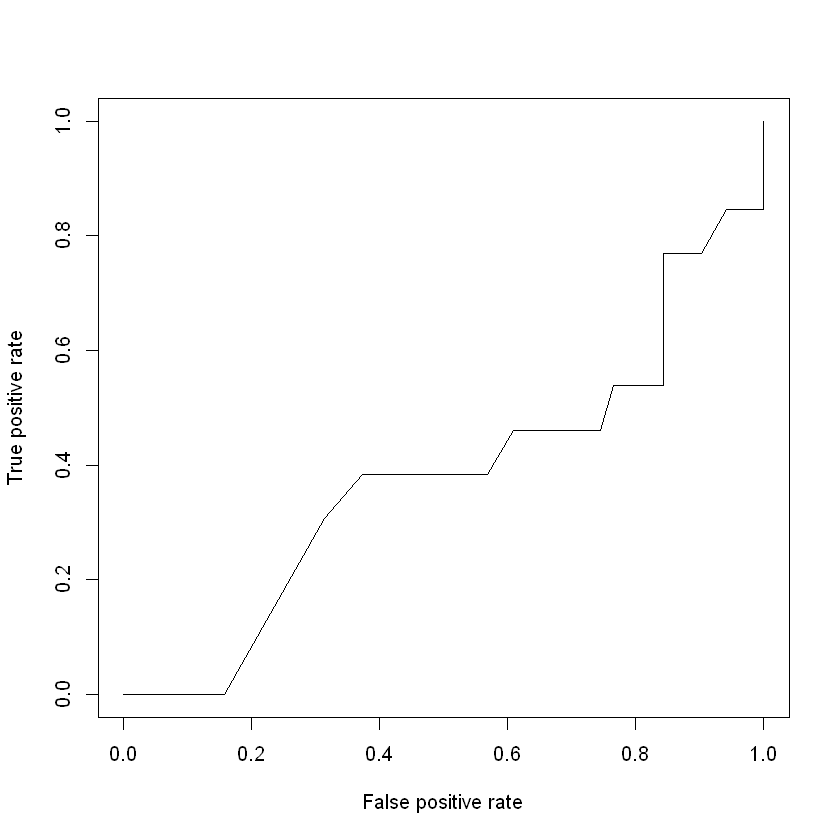

In [9]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [10]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.3785822


Call:
glm(formula = comp2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0611  -0.7353  -0.6294  -0.5791   1.9331  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.07074    0.84754  -1.263    0.206
sexMale            0.18241    0.57405   0.318    0.751
definitionharmony -0.35595    0.51658  -0.689    0.491
needharmony       -0.19980    0.47097  -0.424    0.671
purposecosmetic    0.84034    0.58310   1.441    0.150
purposeetc         0.06281    0.57080   0.110    0.912
interest          -0.02475    0.18950  -0.131    0.896

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 157.57  on 148  degrees of freedom
Residual deviance: 153.44  on 142  degrees of freedom
AIC: 167.44

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,157.5736,NA
sex,1,0.26170820,147,157.3119,0.6089490
definition,1,0.88020792,146,156.4317,0.3481447
need,1,0.27061809,145,156.1610,0.6029175
purpose,2,2.70106572,143,153.4600,0.2591022
interest,1,0.01704129,142,153.4429,0.8961374


[1] 0.4092857

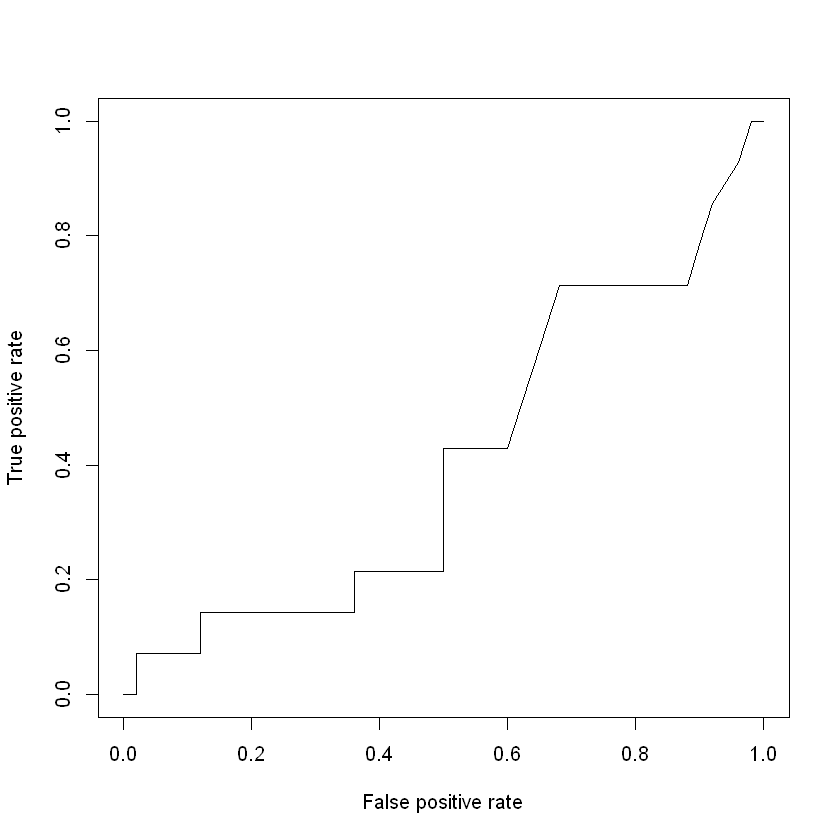

In [11]:
model <- glm(comp2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8490  -0.6584  -0.5544  -0.4652   2.2157  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.8076     0.9378  -0.861    0.389
sexMale            -0.1503     0.5762  -0.261    0.794
definitionharmony   0.5699     0.6203   0.919    0.358
needharmony        -0.3812     0.5016  -0.760    0.447
purposecosmetic    -0.5104     0.6890  -0.741    0.459
purposeetc         -0.2821     0.5895  -0.479    0.632
interest           -0.2235     0.2066  -1.082    0.279

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 137.96  on 148  degrees of freedom
Residual deviance: 134.74  on 142  degrees of freedom
AIC: 148.74

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,137.9576,NA
sex,1,0.2034043,147,137.7542,0.6519869
definition,1,0.6743895,146,137.0798,0.4115254
need,1,0.5031268,145,136.5767,0.4781295
purpose,2,0.6542161,143,135.9225,0.7210058
interest,1,1.1780531,142,134.7444,0.2777527


[1] 0.3780193

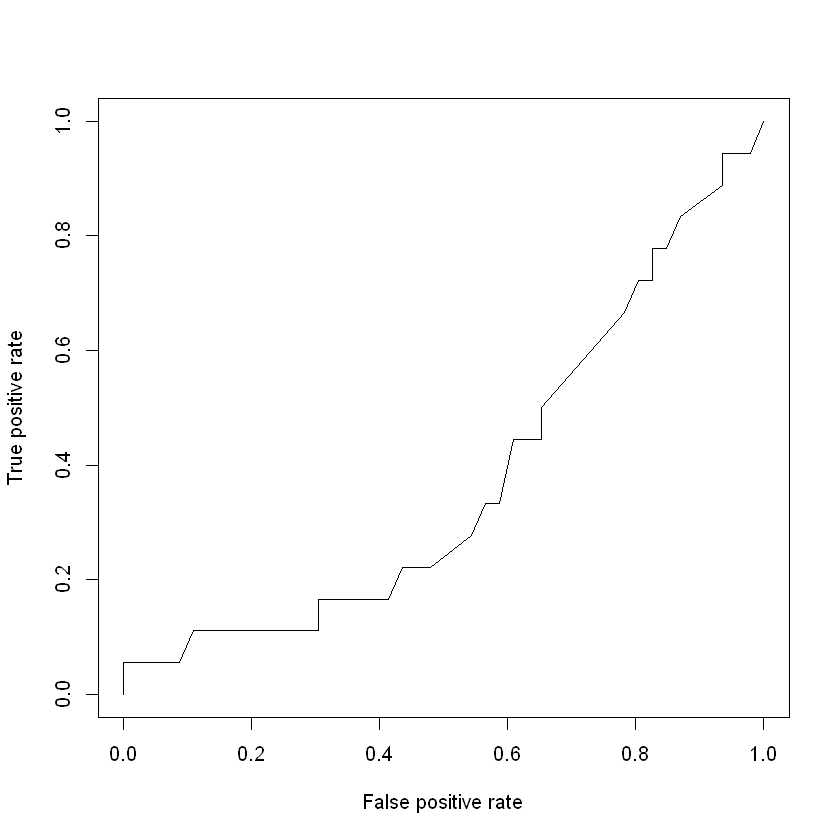

In [12]:
model <- glm(comp3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0995  -0.5461  -0.3890  -0.3239   2.4538  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.9775     1.1674  -1.694   0.0903 .
sexMale             0.3391     0.7843   0.432   0.6655  
definitionharmony   1.0755     0.7077   1.520   0.1286  
needharmony        -1.4523     0.5962  -2.436   0.0149 *
purposecosmetic     0.2351     0.8808   0.267   0.7896  
purposeetc          1.0938     0.7430   1.472   0.1409  
interest           -0.1890     0.2453  -0.771   0.4410  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 109.82  on 148  degrees of freedom
Residual deviance: 101.25  on 142  degrees of freedom
AIC: 115.25

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,109.8209,NA
sex,1,0.0934497,147,109.7275,0.75983654
definition,1,0.2582852,146,109.4692,0.61130068
need,1,5.1393179,145,104.3299,0.02338984
purpose,2,2.4823224,143,101.8475,0.28904838
interest,1,0.5952291,142,101.2523,0.44040416


[1] 0.3446115

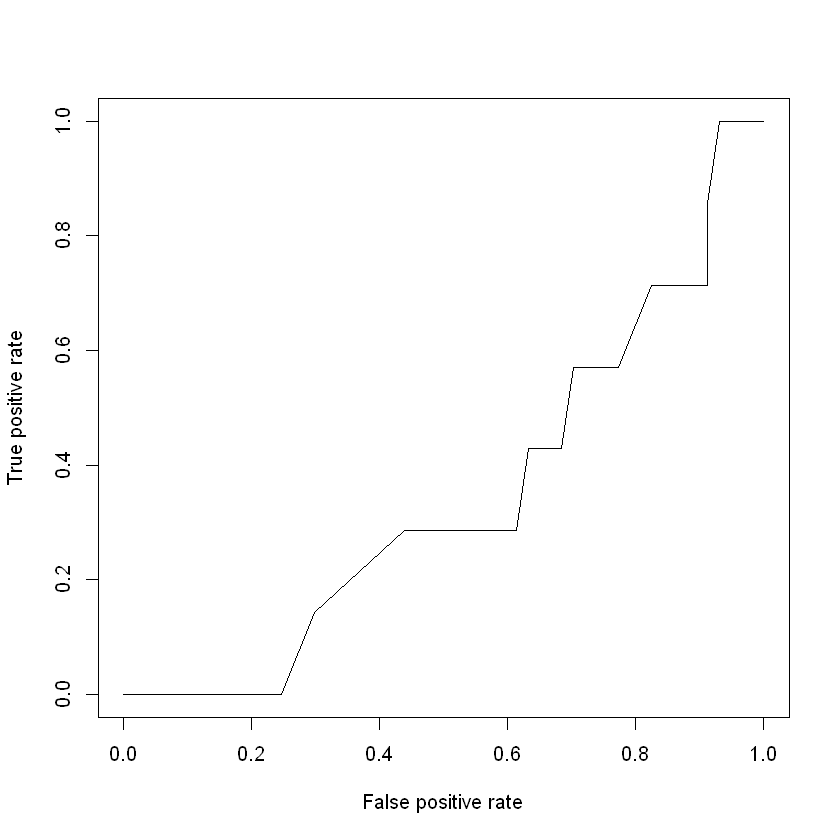

In [13]:
model <- glm(comp4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0197  -0.6768  -0.5883  -0.4227   2.2443  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.580692   0.910763  -1.736   0.0826 .
sexMale            0.444236   0.557754   0.796   0.4258  
definitionharmony -0.537069   0.595396  -0.902   0.3670  
needharmony        0.771259   0.542751   1.421   0.1553  
purposecosmetic   -0.302441   0.689690  -0.439   0.6610  
purposeetc        -0.242248   0.592763  -0.409   0.6828  
interest          -0.003531   0.197799  -0.018   0.9858  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 143.99  on 148  degrees of freedom
Residual deviance: 139.24  on 142  degrees of freedom
AIC: 153.24

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,143.9912,NA
sex,1,2.2231815416,147,141.7681,0.1359526
definition,1,0.0714709747,146,141.6966,0.7892070
need,1,2.2062118150,145,139.4904,0.1374558
purpose,2,0.2513333066,143,139.2390,0.8819088
interest,1,0.0003185446,142,139.2387,0.9857603


[1] 0.3878205

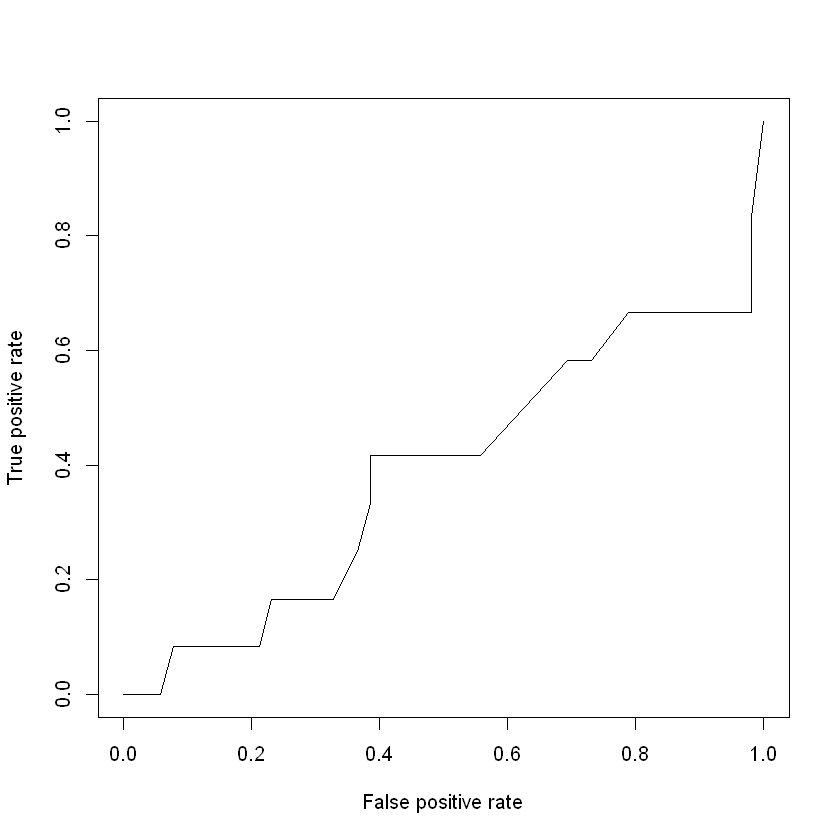

In [14]:
model <- glm(comp5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1232  -0.6110  -0.4968  -0.3721   2.3495  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -3.6798     1.1359  -3.240   0.0012 **
sexMale             0.9861     0.7005   1.408   0.1592   
definitionharmony   0.5753     0.7479   0.769   0.4418   
needharmony         0.3397     0.5884   0.577   0.5637   
purposecosmetic     1.0044     0.7795   1.288   0.1976   
purposeetc          0.6215     0.7391   0.841   0.4004   
interest            0.1291     0.2192   0.589   0.5559   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 121.19  on 148  degrees of freedom
Residual deviance: 115.79  on 142  degrees of freedom
AIC: 129.79

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,121.1863,NA
sex,1,1.5692869,147,119.6170,0.2103106
definition,1,1.2688513,146,118.3482,0.2599823
need,1,0.3306449,145,118.0175,0.5652796
purpose,2,1.8768284,143,116.1407,0.3912478
interest,1,0.3505903,142,115.7901,0.5537792


[1] 0.4948542

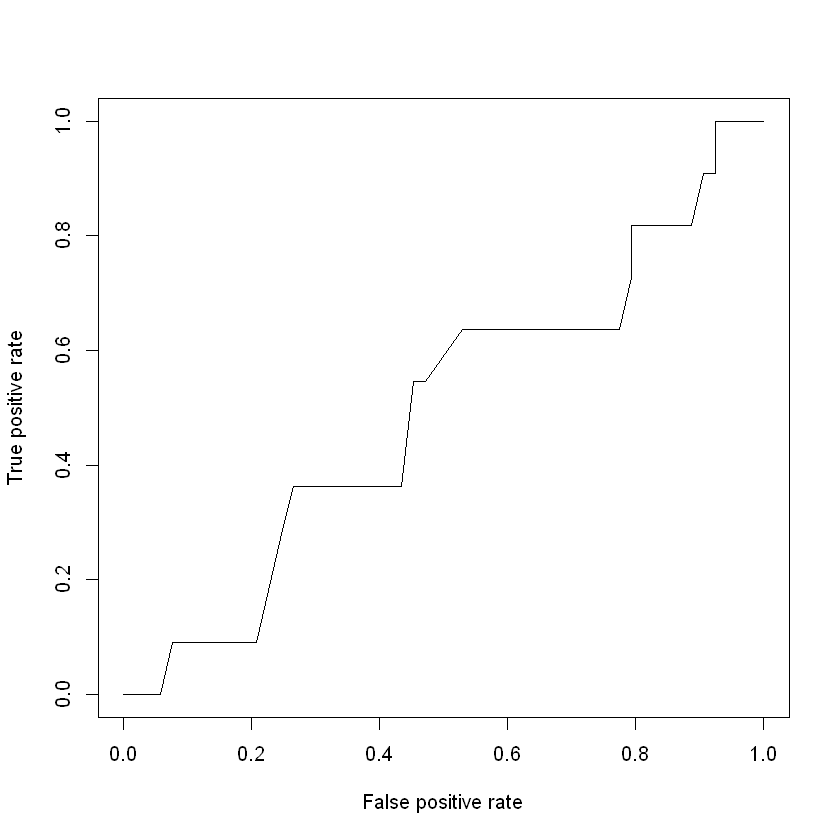

In [15]:
model <- glm(t1_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2416  -0.5401  -0.3903  -0.2809   2.6116  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)         0.2418     1.0912   0.222   0.8247  
sexMale             0.8489     0.7613   1.115   0.2648  
definitionharmony  -1.4171     0.7129  -1.988   0.0468 *
needharmony         0.1079     0.6558   0.165   0.8693  
purposecosmetic    -0.3613     0.9806  -0.368   0.7125  
purposeetc          0.9454     0.7152   1.322   0.1862  
interest           -0.5773     0.2487  -2.321   0.0203 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113.73  on 148  degrees of freedom
Residual deviance: 101.76  on 142  degrees of freedom
AIC: 115.76

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,113.7284,NA
sex,1,0.35392106,147,113.3744,0.55190186
definition,1,3.56313604,146,109.8113,0.05907603
need,1,0.01274642,145,109.7986,0.91010981
purpose,2,2.24290494,143,107.5557,0.32580623
interest,1,5.79434216,142,101.7613,0.01607783


[1] 0.4262436

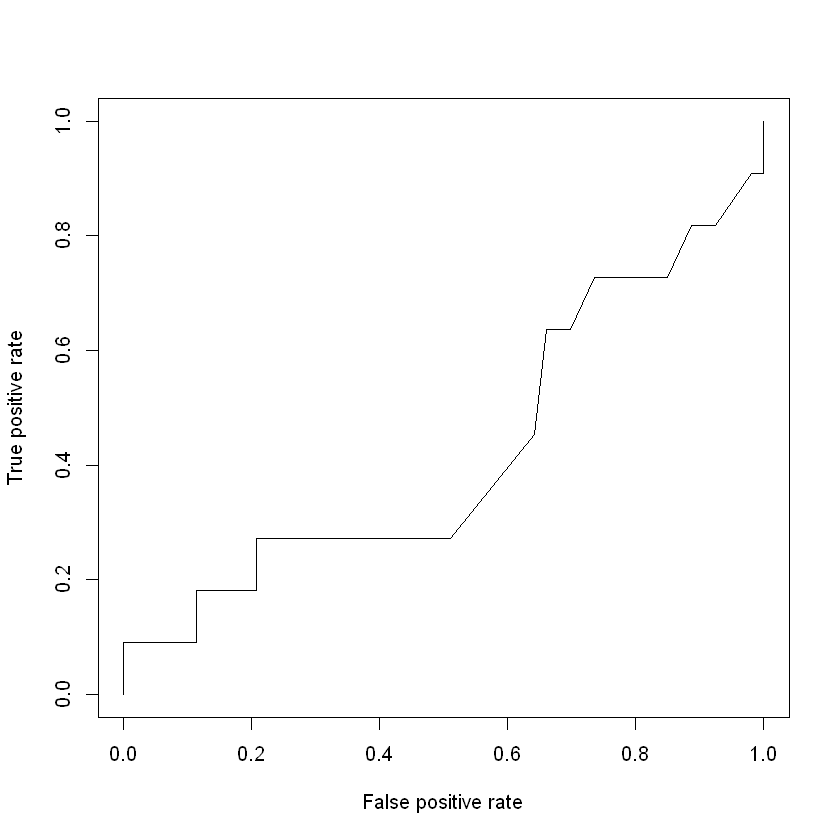

In [16]:
model <- glm(t1_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8205  -0.7398  -0.6394  -0.5216   2.1247  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.92346    0.86288  -1.070    0.285
sexMale           -0.58928    0.57694  -1.021    0.307
definitionharmony -0.26591    0.54142  -0.491    0.623
needharmony        0.34720    0.49496   0.701    0.483
purposecosmetic    0.05204    0.59263   0.088    0.930
purposeetc        -0.08525    0.53853  -0.158    0.874
interest          -0.07360    0.19499  -0.377    0.706

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 152.39  on 148  degrees of freedom
Residual deviance: 150.33  on 142  degrees of freedom
AIC: 164.33

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,152.3872,NA
sex,1,1.31793610,147,151.0693,0.2509628
definition,1,0.01205911,146,151.0572,0.9125569
need,1,0.49140380,145,150.5658,0.4833018
purpose,2,0.08966480,143,150.4762,0.9561577
interest,1,0.14229972,142,150.3339,0.7060054


[1] 0.4823129

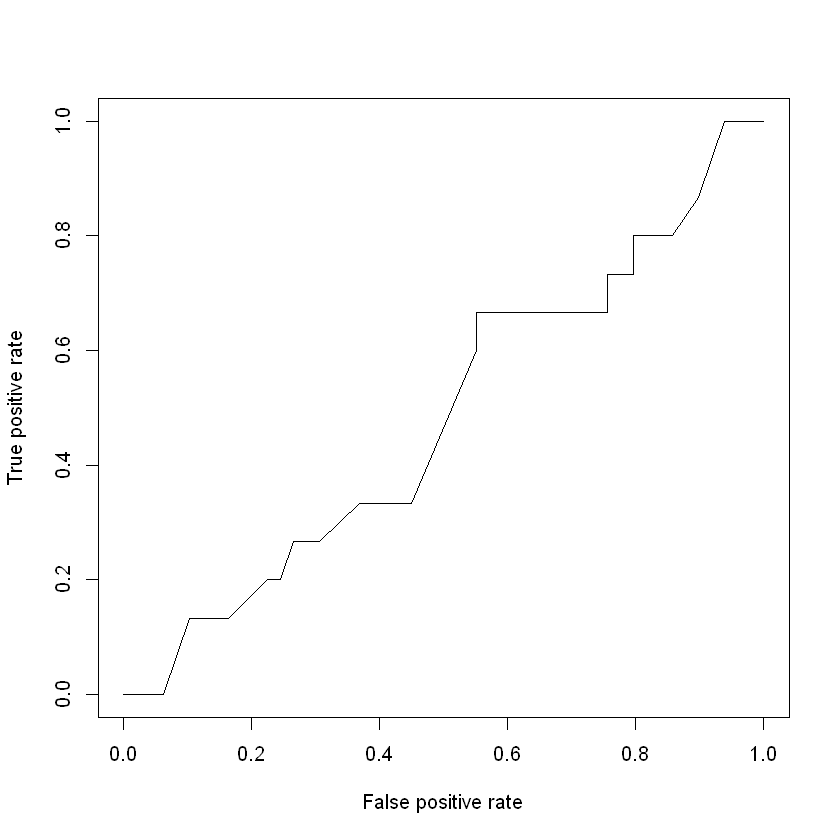

In [17]:
model <- glm(t1_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0647  -0.8418  -0.6843   1.2620   1.9589  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.07339    0.85162  -2.435   0.0149 *
sexMale           -0.97902    0.55695  -1.758   0.0788 .
definitionharmony  0.31197    0.50604   0.616   0.5376  
needharmony        0.10433    0.44962   0.232   0.8165  
purposecosmetic    0.03233    0.55084   0.059   0.9532  
purposeetc        -0.07442    0.49974  -0.149   0.8816  
interest           0.29207    0.19112   1.528   0.1265  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 171.31  on 148  degrees of freedom
Residual deviance: 164.01  on 142  degrees of freedom
AIC: 178.01

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,171.3125,NA
sex,1,4.431521051,147,166.8810,0.03528105
definition,1,0.412118681,146,166.4689,0.52089610
need,1,0.032984931,145,166.4359,0.85588288
purpose,2,0.009338062,143,166.4265,0.99534185
interest,1,2.416369284,142,164.0102,0.12007294


[1] 0.5253623

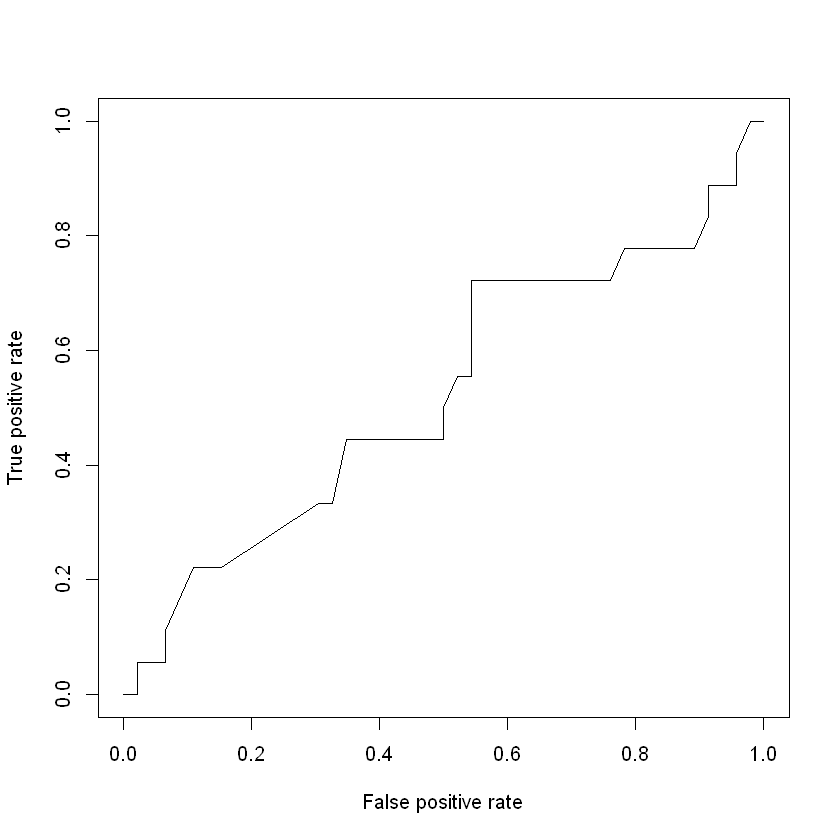

In [18]:
model <- glm(t1_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1444  -0.8032  -0.6370   1.2296   1.9670  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.78874    0.81145  -0.972    0.331
sexMale            0.27291    0.49602   0.550    0.582
definitionharmony  0.32819    0.51166   0.641    0.521
needharmony       -0.59288    0.43854  -1.352    0.176
purposecosmetic   -0.59767    0.58994  -1.013    0.311
purposeetc        -0.76882    0.53749  -1.430    0.153
interest           0.02188    0.17990   0.122    0.903

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 171.31  on 148  degrees of freedom
Residual deviance: 164.69  on 142  degrees of freedom
AIC: 178.69

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,171.3125,NA
sex,1,2.475007739,147,168.8375,0.1156689
definition,1,0.008870907,146,168.8286,0.9249618
need,1,1.884829437,145,166.9438,0.1697863
purpose,2,2.237033985,143,164.7068,0.3267640
interest,1,0.014803176,142,164.6920,0.9031617


[1] 0.4313131

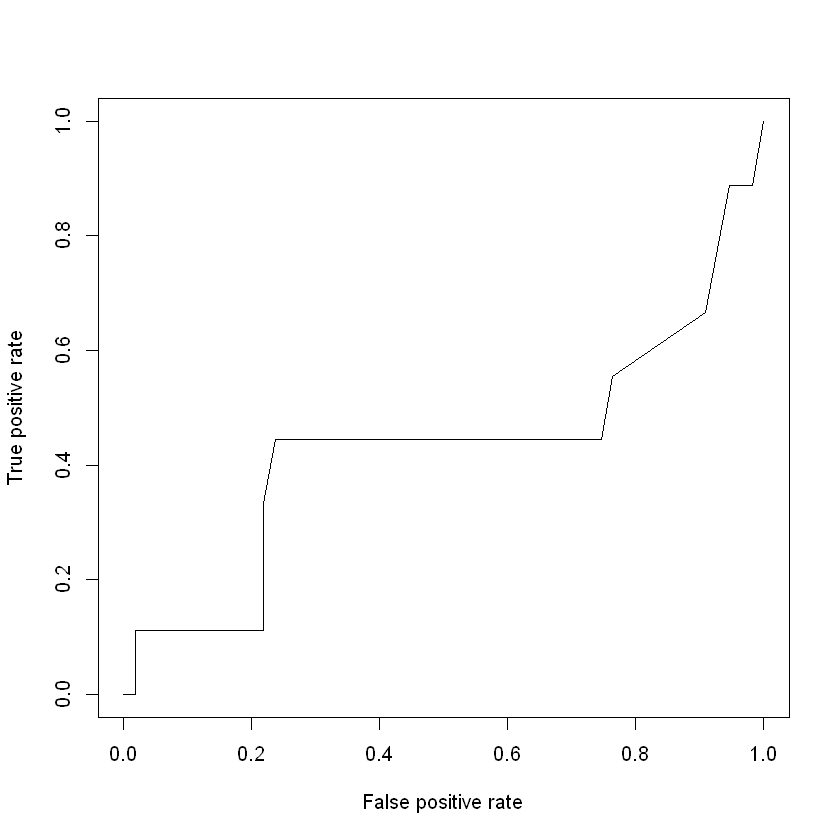

In [19]:
model <- glm(t1_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8574  -0.6731  -0.5691  -0.3510   2.3738  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.0002     0.9939  -2.012   0.0442 *
sexMale            -1.0774     0.7462  -1.444   0.1488  
definitionharmony   0.0782     0.5800   0.135   0.8927  
needharmony        -0.1488     0.5342  -0.279   0.7806  
purposecosmetic     0.0294     0.6746   0.044   0.9652  
purposeetc          0.5349     0.5746   0.931   0.3519  
interest            0.1308     0.2247   0.582   0.5606  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.8  on 148  degrees of freedom
Residual deviance: 127.2  on 142  degrees of freedom
AIC: 141.2

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,134.8024,NA
sex,1,5.77471429,147,129.0277,0.01625836
definition,1,0.01683101,146,129.0108,0.89677658
need,1,0.05833768,145,128.9525,0.80914286
purpose,2,1.41062419,143,127.5419,0.49395439
interest,1,0.34211882,142,127.1998,0.55860874


[1] 0.5101852

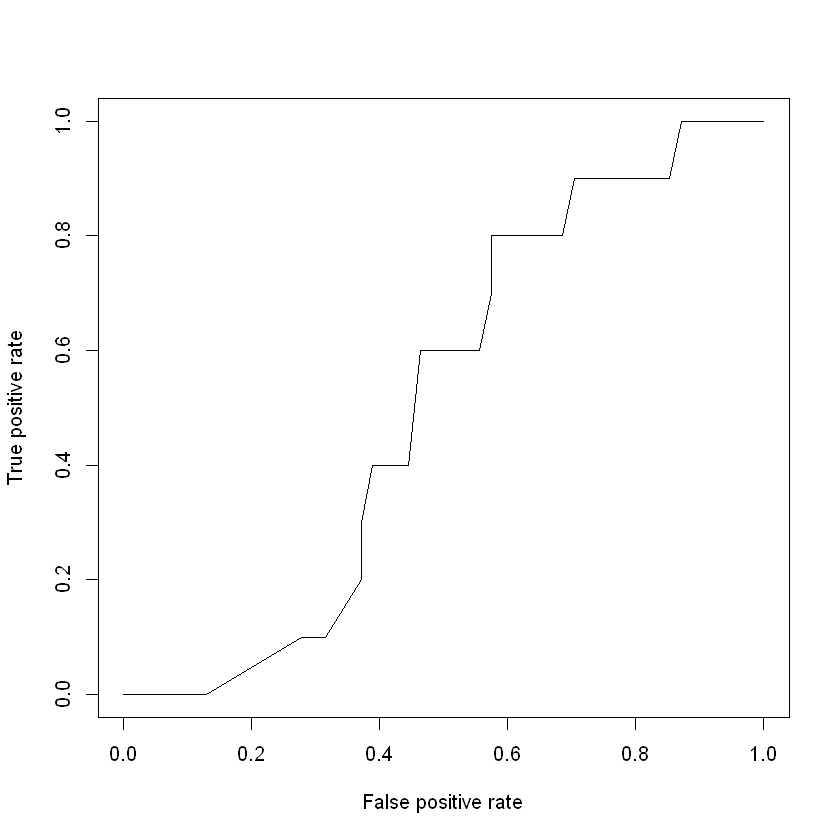

In [20]:
model <- glm(t2_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0759  -0.7795  -0.5979  -0.4384   2.2677  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.23953    0.87886  -1.410    0.158
sexMale            0.22300    0.52345   0.426    0.670
definitionharmony  0.40038    0.60370   0.663    0.507
needharmony        0.57048    0.49019   1.164    0.245
purposecosmetic   -0.05194    0.61705  -0.084    0.933
purposeetc        -0.26247    0.56250  -0.467    0.641
interest          -0.19796    0.18547  -1.067    0.286

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 160.05  on 148  degrees of freedom
Residual deviance: 152.83  on 142  degrees of freedom
AIC: 166.83

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,160.0491,NA
sex,1,2.1174488,147,157.9316,0.1456290
definition,1,2.2110067,146,155.7206,0.1370292
need,1,1.3743299,145,154.3463,0.2410693
purpose,2,0.3712138,143,153.9751,0.8306000
interest,1,1.1466039,142,152.8285,0.2842612


[1] 0.433584

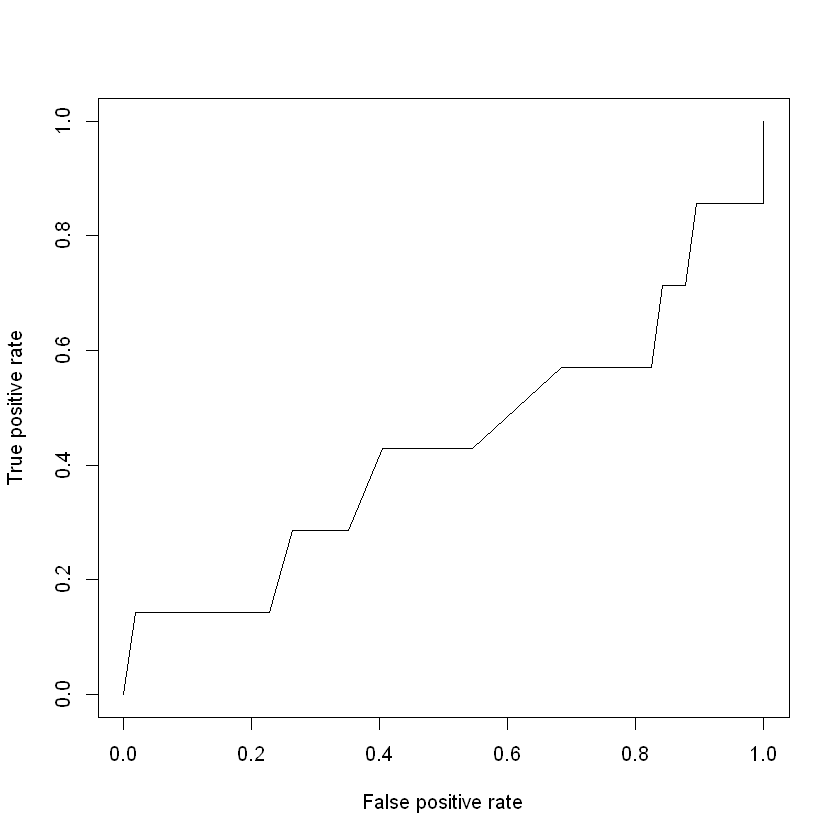

In [21]:
model <- glm(t2_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2254  -0.7932  -0.6379  -0.5223   2.0055  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.91079    0.81019  -1.124    0.261
sexMale            0.55159    0.51519   1.071    0.284
definitionharmony -0.74144    0.51153  -1.449    0.147
needharmony        0.19157    0.46368   0.413    0.679
purposecosmetic   -0.25211    0.60245  -0.418    0.676
purposeetc        -0.38293    0.53933  -0.710    0.478
interest           0.05596    0.18084   0.309    0.757

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 167.02  on 148  degrees of freedom
Residual deviance: 162.05  on 142  degrees of freedom
AIC: 176.05

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,167.0243,NA
sex,1,2.09049013,147,164.9338,0.1482185
definition,1,2.13801477,146,162.7958,0.1436877
need,1,0.18131366,145,162.6145,0.6702467
purpose,2,0.47249261,143,162.1420,0.7895862
interest,1,0.09602495,142,162.0460,0.7566530


[1] 0.5880682

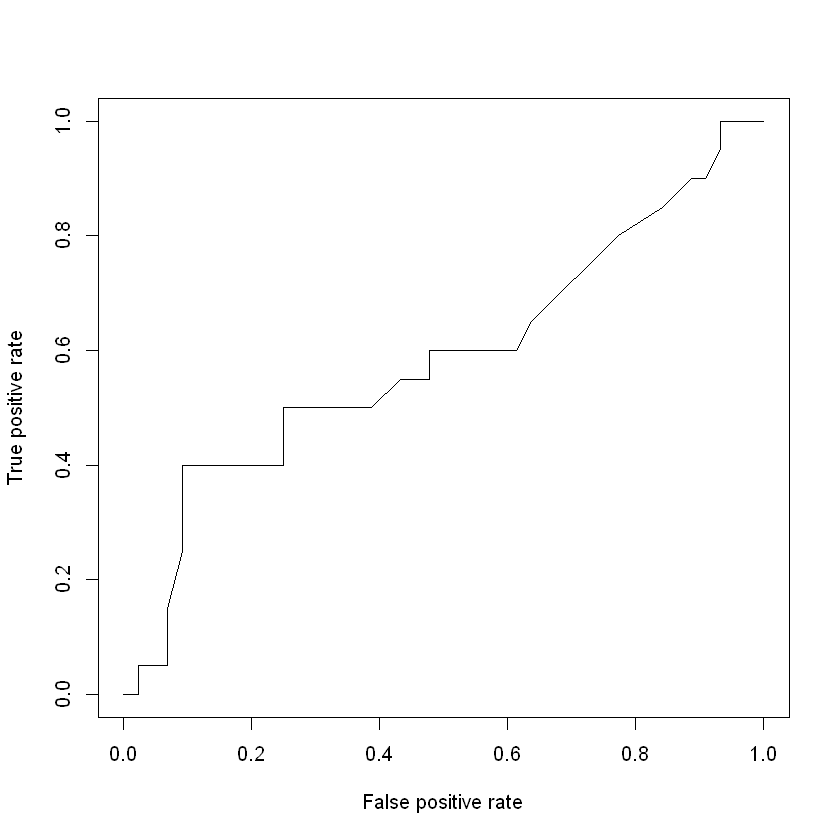

In [22]:
model <- glm(t2_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9908  -0.7647  -0.6561  -0.5115   1.8698  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.91255    0.83639  -1.091    0.275
sexMale           -0.30127    0.53453  -0.564    0.573
definitionharmony  0.58664    0.52897   1.109    0.267
needharmony       -0.62364    0.44712  -1.395    0.163
purposecosmetic   -0.01944    0.57032  -0.034    0.973
purposeetc        -0.39003    0.53935  -0.723    0.470
interest          -0.04344    0.18651  -0.233    0.816

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 162.45  on 148  degrees of freedom
Residual deviance: 159.09  on 142  degrees of freedom
AIC: 173.09

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,162.4484,NA
sex,1,0.11464222,147,162.3337,0.7349197
definition,1,0.39068485,146,161.9431,0.5319396
need,1,2.07386285,145,159.8692,0.1498416
purpose,2,0.72615592,143,159.1430,0.6955322
interest,1,0.05420646,142,159.0888,0.8158990


[1] 0.4502573

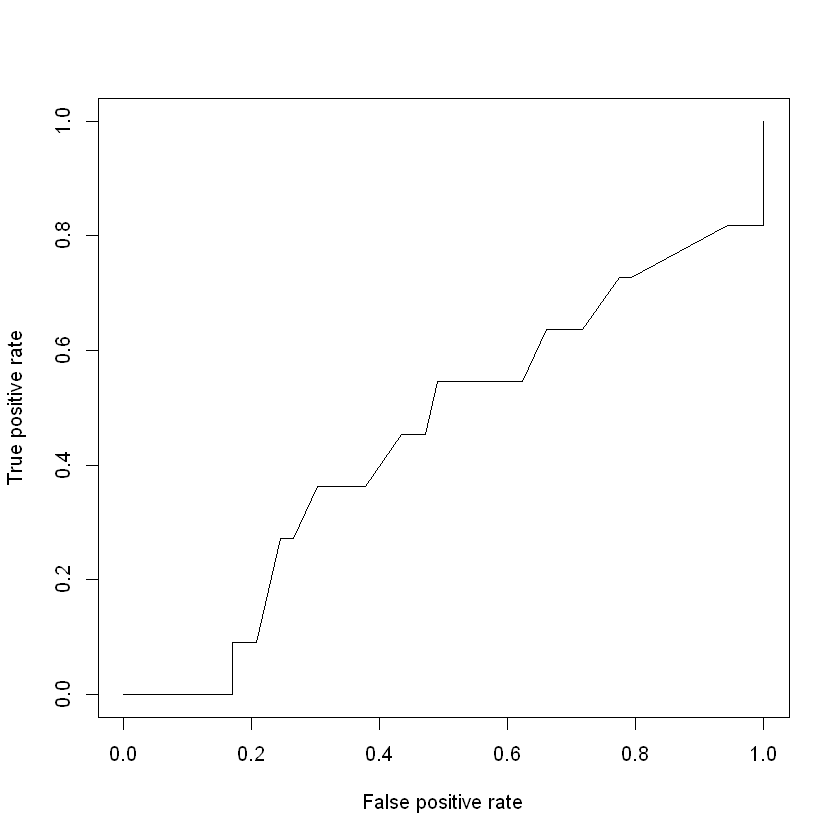

In [23]:
model <- glm(t2_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7112  -0.5532  -0.4560  -0.3876   2.3523  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.79168    1.12936  -2.472   0.0134 *
sexMale            0.08438    0.77976   0.108   0.9138  
definitionharmony -0.28458    0.66566  -0.428   0.6690  
needharmony        0.08982    0.62175   0.144   0.8851  
purposecosmetic    0.60631    0.80267   0.755   0.4500  
purposeetc         0.82038    0.71512   1.147   0.2513  
interest           0.14514    0.24483   0.593   0.5533  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 109.82  on 148  degrees of freedom
Residual deviance: 106.81  on 142  degrees of freedom
AIC: 120.81

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,109.8209,NA
sex,1,0.75721902,147,109.0637,0.3842002
definition,1,0.26008099,146,108.8036,0.6100645
need,1,0.01929968,145,108.7843,0.8895108
purpose,2,1.61763441,143,107.1667,0.4453846
interest,1,0.35651743,142,106.8102,0.5504468


[1] 0.546224

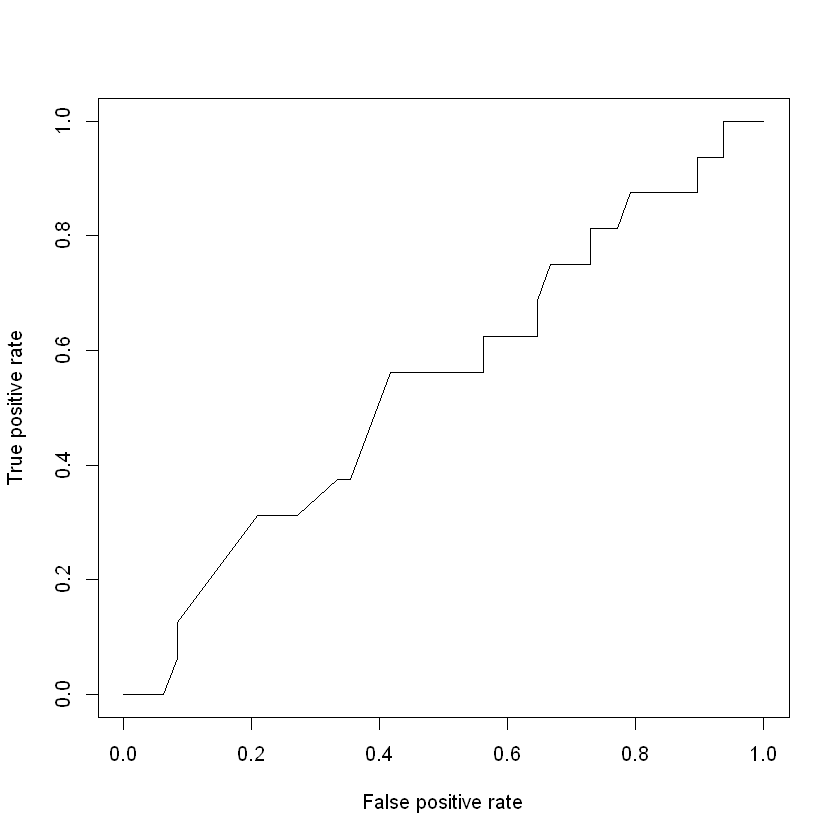

In [24]:
model <- glm(t2_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8295  -0.6969  -0.6408  -0.5454   1.9994  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.02891    0.89949  -2.256   0.0241 *
sexMale            0.04152    0.56916   0.073   0.9418  
definitionharmony -0.13337    0.55622  -0.240   0.8105  
needharmony        0.32087    0.50031   0.641   0.5213  
purposecosmetic   -0.06941    0.65145  -0.107   0.9152  
purposeetc         0.28232    0.55188   0.512   0.6090  
interest           0.13383    0.19590   0.683   0.4945  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 149.67  on 148  degrees of freedom
Residual deviance: 148.16  on 142  degrees of freedom
AIC: 162.16

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,149.6728,NA
sex,1,0.013451723,147,149.6593,0.9076672
definition,1,0.001532281,146,149.6578,0.9687753
need,1,0.457385834,145,149.2004,0.4988482
purpose,2,0.569230438,143,148.6312,0.7523037
interest,1,0.471562632,142,148.1596,0.4922692


[1] 0.5344828

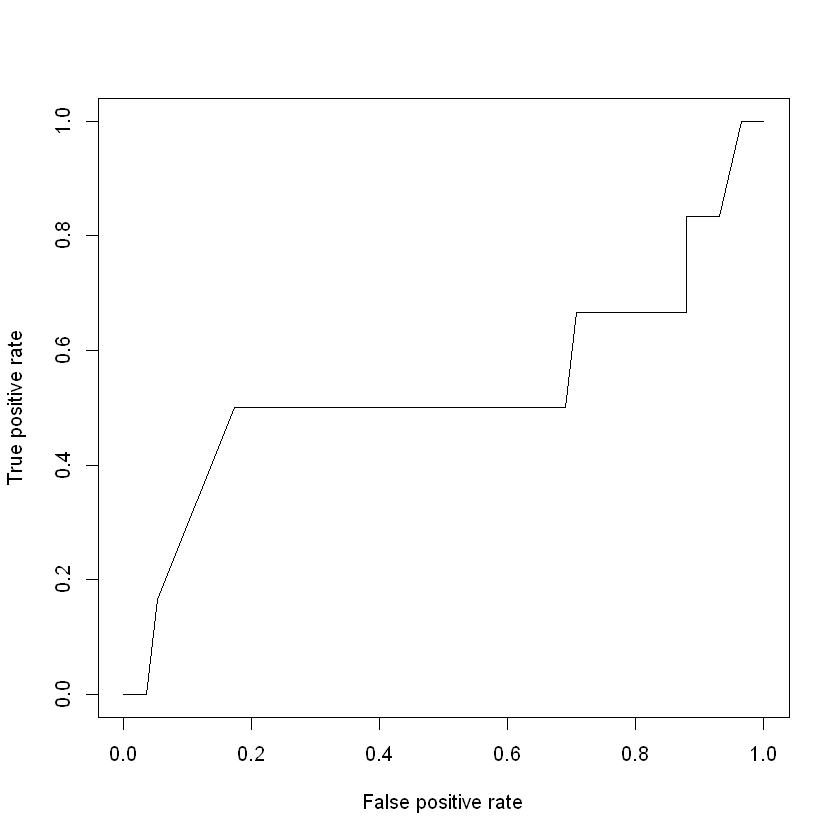

In [25]:
model <- glm(d1_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4210  -0.9304  -0.7650   1.2584   1.8073  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.8933     0.7655   1.167    0.243
sexMale            -0.4785     0.4904  -0.976    0.329
definitionharmony  -0.4080     0.4564  -0.894    0.371
needharmony        -0.5804     0.4100  -1.415    0.157
purposecosmetic    -0.4248     0.5358  -0.793    0.428
purposeetc         -0.4365     0.4785  -0.912    0.362
interest           -0.1684     0.1706  -0.987    0.324

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 191.48  on 148  degrees of freedom
Residual deviance: 183.84  on 142  degrees of freedom
AIC: 197.84

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,191.4762,NA
sex,1,1.072054,147,190.4041,0.3004819
definition,1,2.511711,146,187.8924,0.1130032
need,1,1.901650,145,185.9907,0.1678938
purpose,2,1.172296,143,184.8184,0.5564667
interest,1,0.981152,142,183.8373,0.3219146


[1] 0.6494318

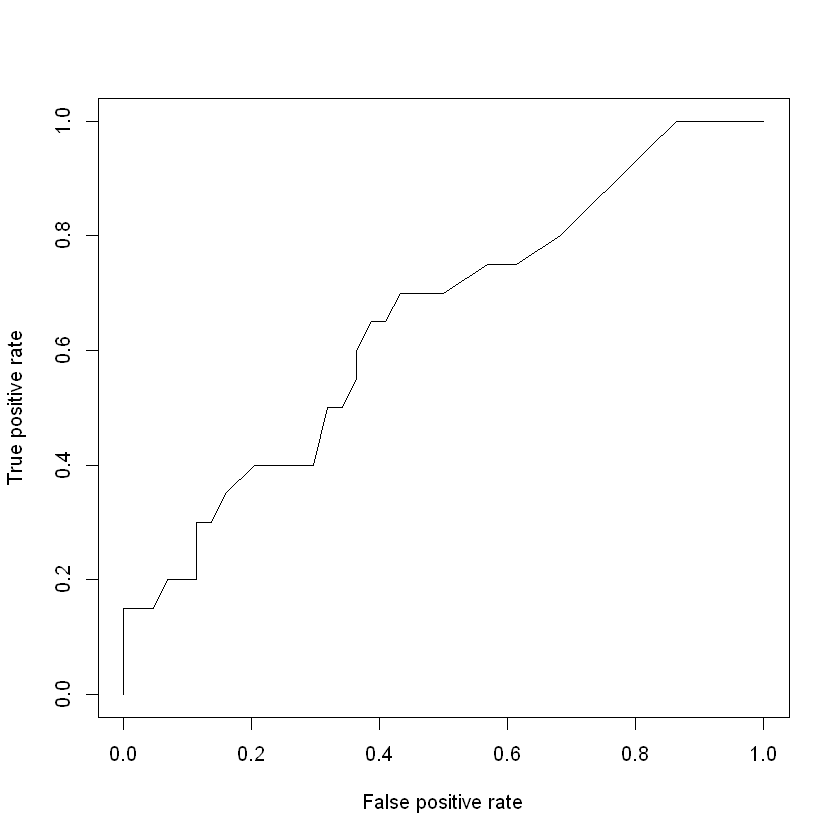

In [26]:
model <- glm(d1_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0273  -0.5873  -0.4919  -0.3760   2.3871  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -3.6884     1.1512  -3.204  0.00135 **
sexMale             1.0493     0.7080   1.482  0.13833   
definitionharmony   0.5430     0.7532   0.721  0.47092   
needharmony         0.2299     0.5938   0.387  0.69863   
purposecosmetic     0.7481     0.8109   0.923  0.35626   
purposeetc          0.6420     0.7442   0.863  0.38836   
interest            0.1508     0.2232   0.676  0.49907   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 117.52  on 148  degrees of freedom
Residual deviance: 112.71  on 142  degrees of freedom
AIC: 126.71

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,117.5151,NA
sex,1,2.0466900,147,115.4684,0.1525375
definition,1,0.8909716,146,114.5774,0.3452141
need,1,0.1692685,145,114.4082,0.6807627
purpose,2,1.2339033,143,113.1743,0.5395868
interest,1,0.4630579,142,112.7112,0.4961983


[1] 0.5864662

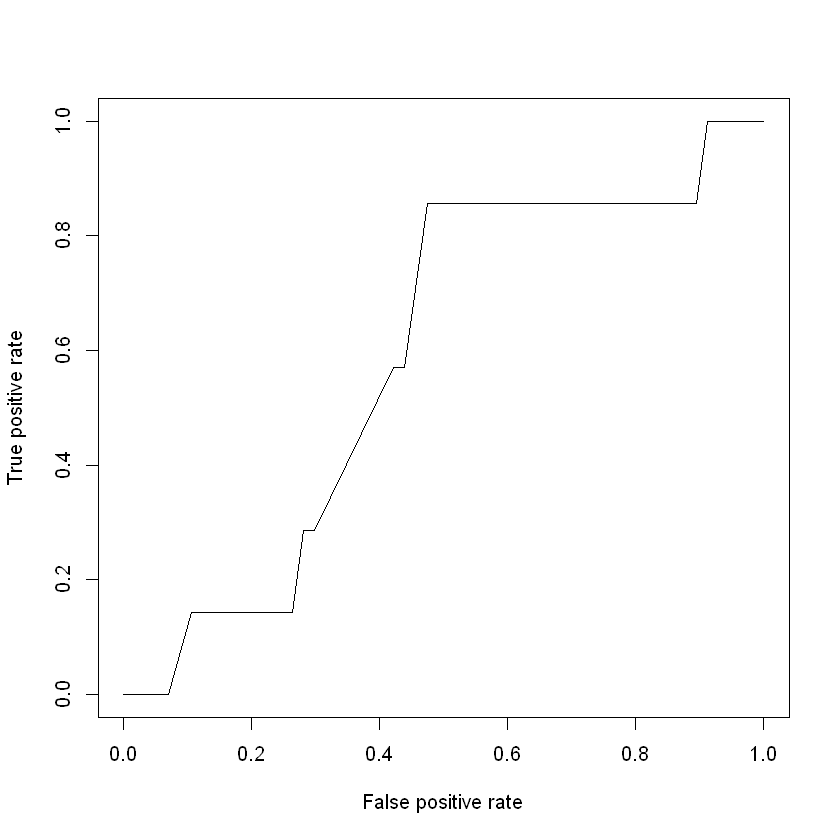

In [27]:
model <- glm(d1_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7728  -0.6972  -0.5756  -0.4601   2.1439  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.62042    0.94266  -1.719   0.0856 .
sexMale            0.10536    0.56743   0.186   0.8527  
definitionharmony  0.36905    0.62486   0.591   0.5548  
needharmony        0.16255    0.51493   0.316   0.7523  
purposecosmetic   -0.65193    0.74823  -0.871   0.3836  
purposeetc         0.11654    0.56994   0.204   0.8380  
interest          -0.07226    0.20028  -0.361   0.7182  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141.02  on 148  degrees of freedom
Residual deviance: 138.15  on 142  degrees of freedom
AIC: 152.15

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,141.0197,NA
sex,1,0.5725475,147,140.4471,0.4492484
definition,1,0.7437638,146,139.7034,0.3884579
need,1,0.1573105,145,139.5461,0.6916448
purpose,2,1.2669482,143,138.2791,0.5307447
interest,1,0.1300925,142,138.1490,0.7183361


[1] 0.5646259

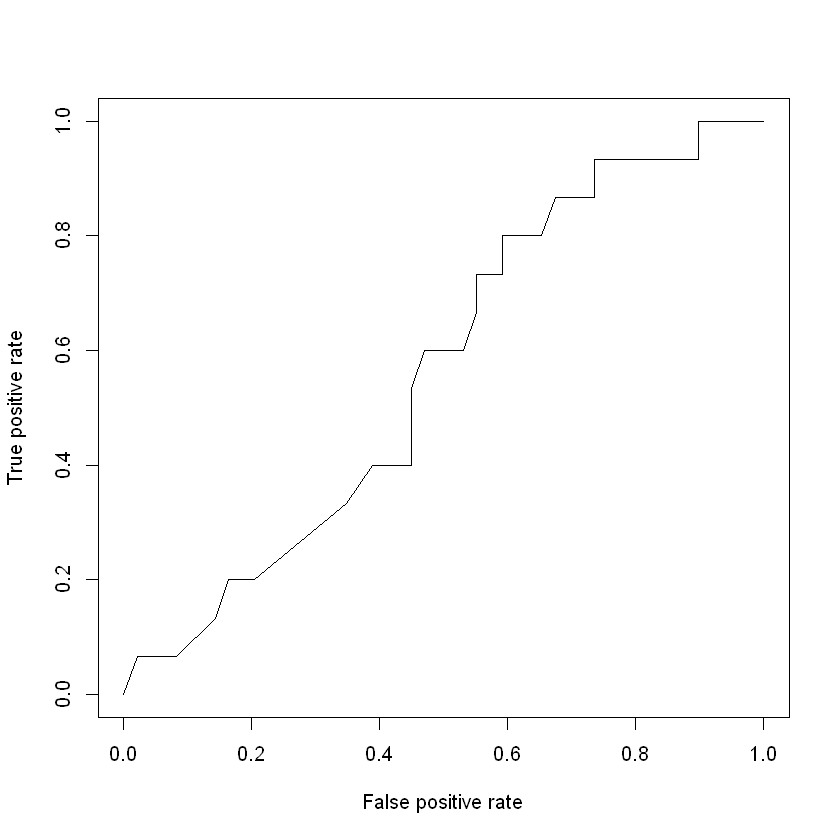

In [28]:
model <- glm(d1_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1299  -0.8096  -0.6593  -0.4357   2.0304  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.10040    0.85888  -2.446   0.0145 *
sexMale           -0.41046    0.54084  -0.759   0.4479  
definitionharmony  0.41404    0.50712   0.816   0.4142  
needharmony       -0.48007    0.44487  -1.079   0.2805  
purposecosmetic   -0.22695    0.58332  -0.389   0.6972  
purposeetc        -0.05604    0.51357  -0.109   0.9131  
interest           0.32593    0.19250   1.693   0.0904 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 167.02  on 148  degrees of freedom
Residual deviance: 161.60  on 142  degrees of freedom
AIC: 175.6

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,167.0243,NA
sex,1,1.01978394,147,166.0045,0.31257026
definition,1,0.01721512,146,165.9873,0.89561203
need,1,1.15719127,145,164.8301,0.28204881
purpose,2,0.24207668,143,164.5881,0.88599999
interest,1,2.98617447,142,161.6019,0.08397834


[1] 0.4877551

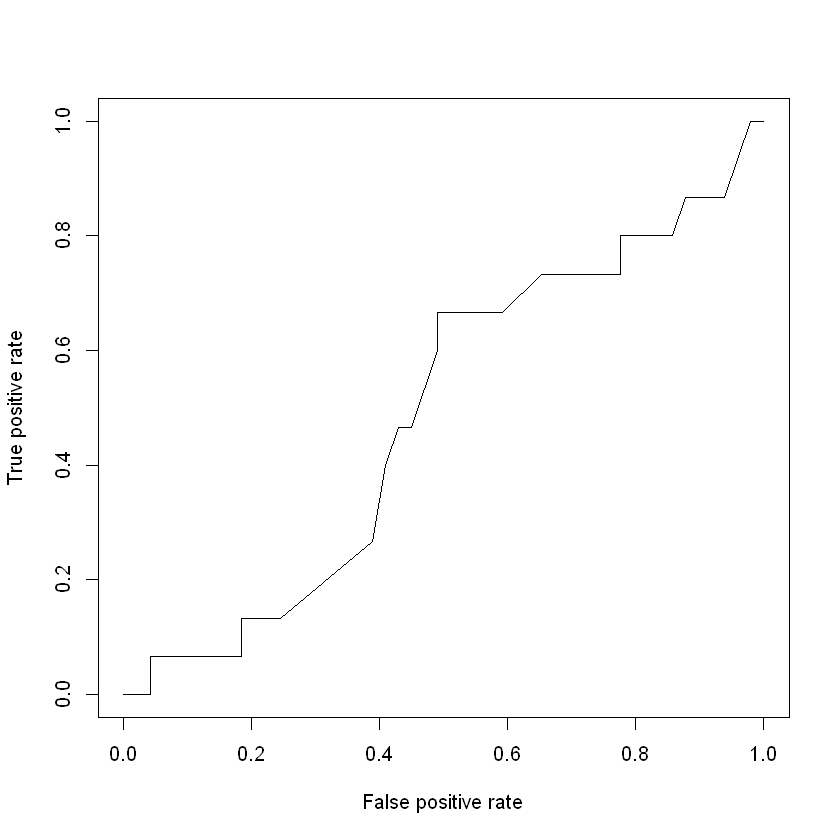

In [29]:
model <- glm(d2_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1322  -0.8614  -0.6970   1.3470   2.0028  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.3729     0.7889  -0.473    0.636
sexMale            -0.2686     0.4917  -0.546    0.585
definitionharmony  -0.2653     0.5134  -0.517    0.605
needharmony         0.6725     0.4572   1.471    0.141
purposecosmetic    -0.6568     0.5861  -1.121    0.262
purposeetc         -0.3524     0.4930  -0.715    0.475
interest           -0.1415     0.1747  -0.810    0.418

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 177.23  on 148  degrees of freedom
Residual deviance: 172.48  on 142  degrees of freedom
AIC: 186.48

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,177.2264,NA
sex,1,0.1645732,147,177.0618,0.6849805
definition,1,0.1010288,146,176.9608,0.7505985
need,1,2.4053192,145,174.5555,0.1209235
purpose,2,1.4187518,143,173.1367,0.4919511
interest,1,0.6571294,142,172.4796,0.4175752


[1] 0.4821429

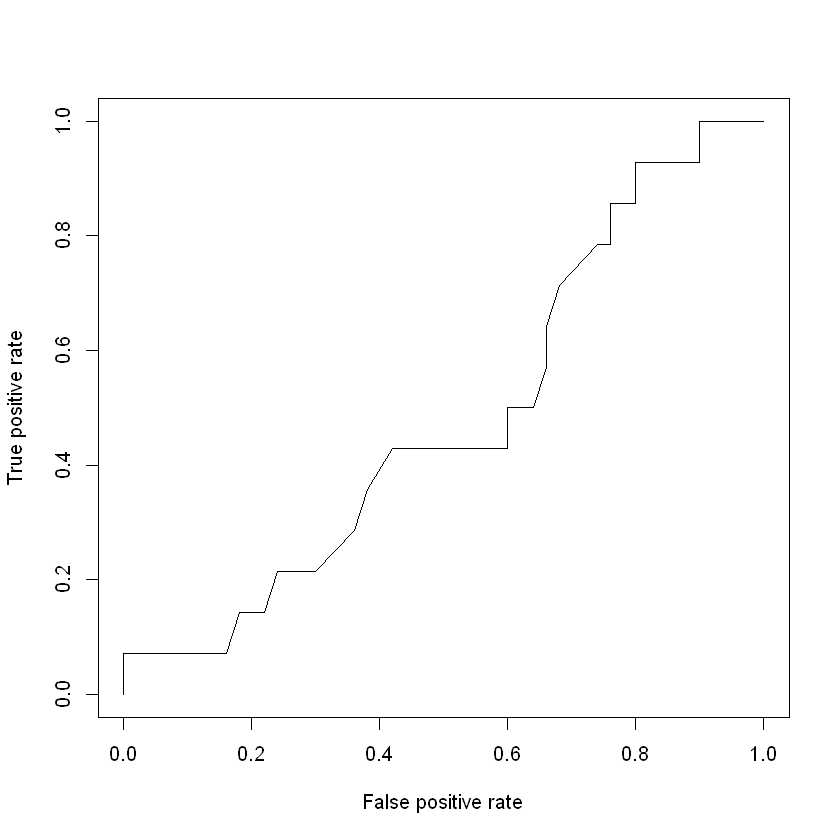

In [30]:
model <- glm(d2_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1236  -0.6304  -0.5275  -0.4034   2.4195  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.7449     1.0205  -1.710   0.0873 .
sexMale             0.4671     0.6690   0.698   0.4851  
definitionharmony   0.2951     0.6990   0.422   0.6730  
needharmony         0.3604     0.5776   0.624   0.5326  
purposecosmetic     0.7380     0.7423   0.994   0.3202  
purposeetc          0.7918     0.6719   1.179   0.2386  
interest           -0.2975     0.2124  -1.401   0.1613  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 128.20  on 148  degrees of freedom
Residual deviance: 123.22  on 142  degrees of freedom
AIC: 137.22

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,128.2002,NA
sex,1,0.1914428,147,128.0088,0.6617185
definition,1,1.0027883,146,127.0060,0.3166368
need,1,0.4582778,145,126.5477,0.4984299
purpose,2,1.3413536,143,125.2064,0.5113624
interest,1,1.9902593,142,123.2161,0.1583138


[1] 0.4717172

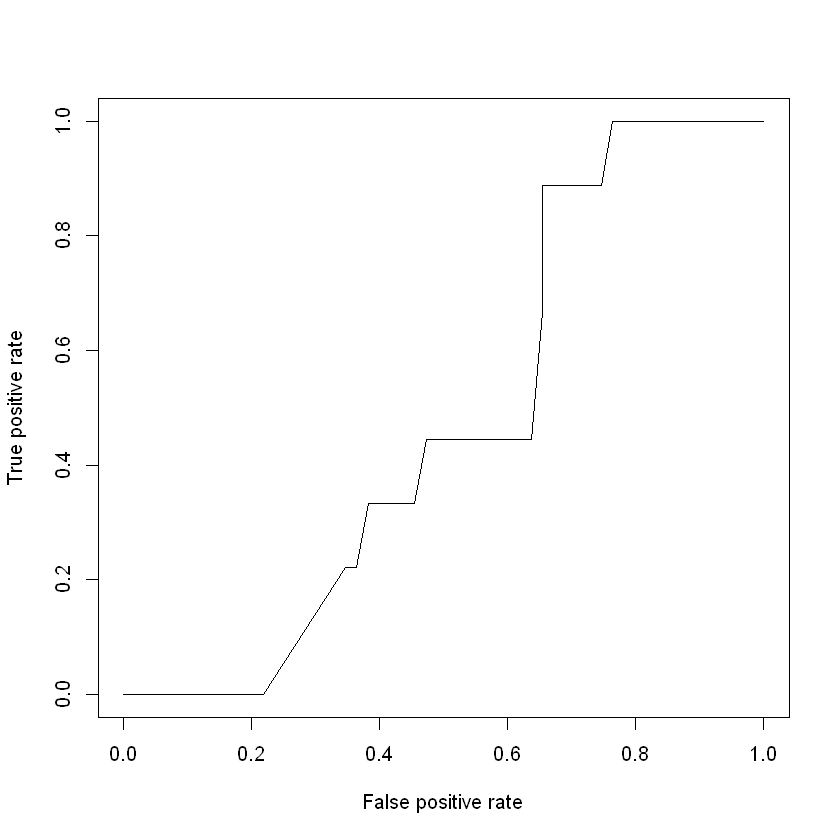

In [31]:
model <- glm(d2_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9214  -0.7341  -0.6204  -0.4921   2.0557  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.34882    0.86049  -0.405    0.685
sexMale           -0.46903    0.58508  -0.802    0.423
definitionharmony -0.09131    0.52453  -0.174    0.862
needharmony       -0.44526    0.47479  -0.938    0.348
purposecosmetic    0.18400    0.58486   0.315    0.753
purposeetc        -0.19234    0.55331  -0.348    0.728
interest          -0.15743    0.19704  -0.799    0.424

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 152.39  on 148  degrees of freedom
Residual deviance: 148.59  on 142  degrees of freedom
AIC: 162.59

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,152.3872,NA
sex,1,1.3179361,147,151.0693,0.2509628
definition,1,0.3263217,146,150.7430,0.5678331
need,1,0.9258525,145,149.8171,0.3359430
purpose,2,0.5905365,143,149.2266,0.7443319
interest,1,0.6396610,142,148.5869,0.4238336


[1] 0.5269086

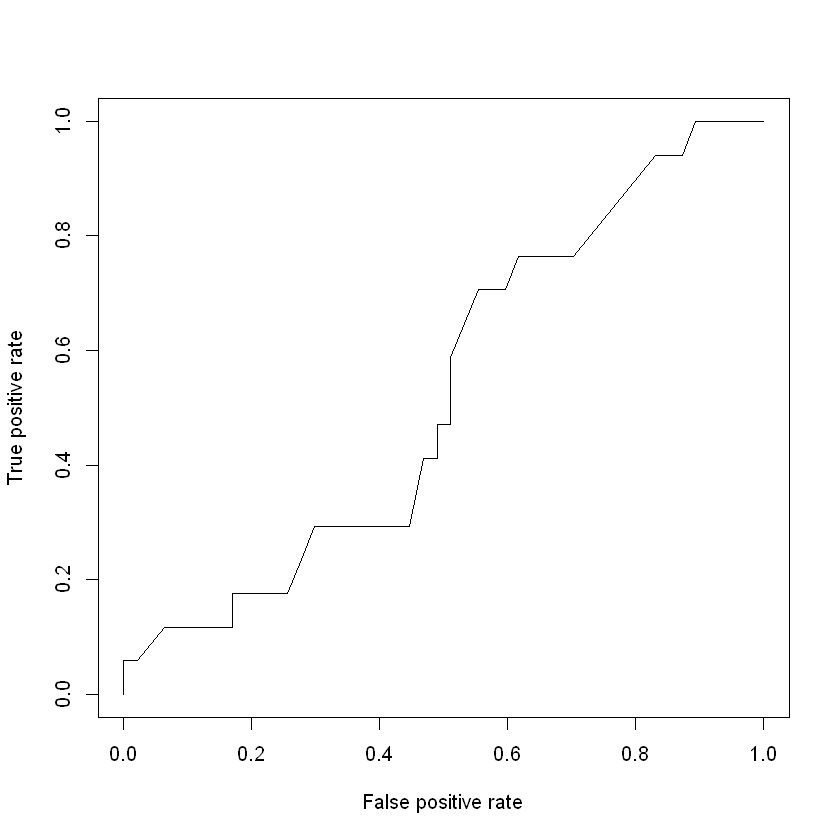

In [32]:
model <- glm(d2_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9590  -0.4994  -0.4074  -0.3071   2.5711  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -3.7029     1.2188  -3.038  0.00238 **
sexMale             1.4499     0.7968   1.820  0.06880 . 
definitionharmony  -0.4589     0.7037  -0.652  0.51430   
needharmony        -0.1910     0.6394  -0.299  0.76521   
purposecosmetic     0.5567     0.8943   0.622  0.53362   
purposeetc          0.2376     0.8428   0.282  0.77797   
interest            0.3616     0.2585   1.399  0.16192   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 101.620  on 148  degrees of freedom
Residual deviance:  95.021  on 142  degrees of freedom
AIC: 109.02

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,101.62029,NA
sex,1,2.86639878,147,98.75389,0.09044705
definition,1,1.08296540,146,97.67093,0.29803512
need,1,0.07338581,145,97.59754,0.78646937
purpose,2,0.50279056,143,97.09475,0.77771490
interest,1,2.07326632,142,95.02149,0.14990018


[1] 0.4191919

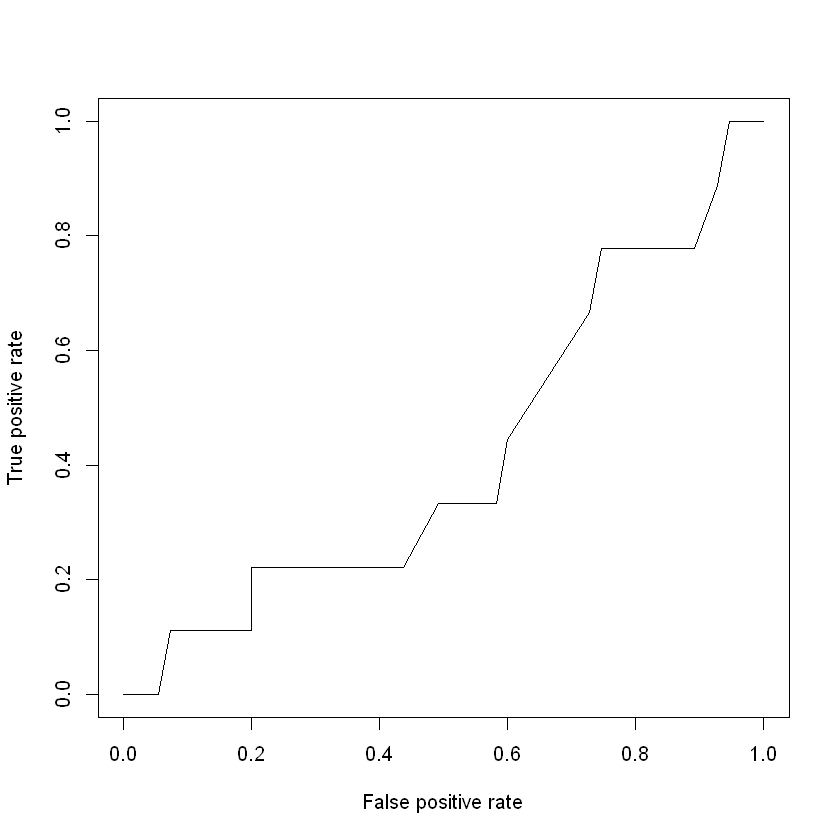

In [33]:
model <- glm(d2_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6488  -0.7373  -0.5444  -0.2192   2.4423  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.0041     0.8656  -1.160   0.2460  
sexMale            -0.2121     0.5604  -0.378   0.7051  
definitionharmony  -0.5131     0.4968  -1.033   0.3017  
needharmony        -0.9665     0.4608  -2.097   0.0360 *
purposecosmetic     0.6307     0.5530   1.140   0.2541  
purposeetc         -1.3082     0.6150  -2.127   0.0334 *
interest            0.2872     0.2047   1.403   0.1606  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 167.02  on 148  degrees of freedom
Residual deviance: 144.97  on 142  degrees of freedom
AIC: 158.97

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,167.0243,NA
sex,1,1.019784,147,166.0045,0.312570264
definition,1,4.124110,146,161.8804,0.042276259
need,1,4.686862,145,157.1936,0.030394113
purpose,2,10.200420,143,146.9932,0.006095466
interest,1,2.026144,142,144.9670,0.154612414


[1] 0.4899749

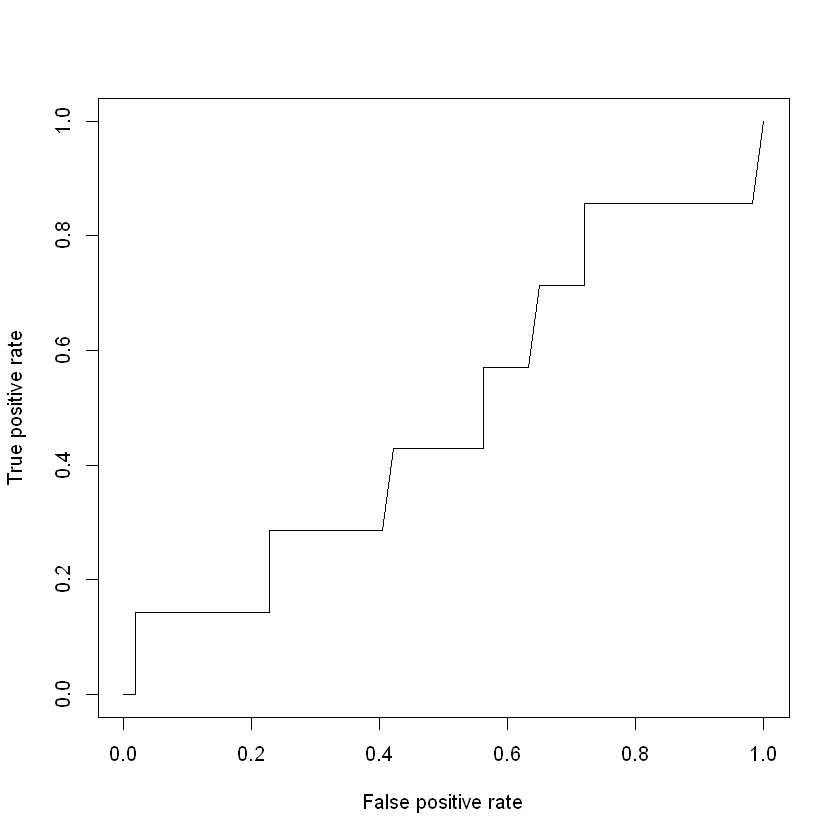

In [34]:
model <- glm(d3_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8034  -0.6675  -0.5873  -0.4053   2.2539  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.58482    0.93878  -1.688   0.0914 .
sexMale           -0.34941    0.57611  -0.606   0.5442  
definitionharmony -0.03634    0.61000  -0.060   0.9525  
needharmony        0.63938    0.54308   1.177   0.2391  
purposecosmetic   -0.78756    0.74119  -1.063   0.2880  
purposeetc         0.07343    0.55131   0.133   0.8940  
interest          -0.02848    0.20440  -0.139   0.8892  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141.02  on 148  degrees of freedom
Residual deviance: 137.23  on 142  degrees of freedom
AIC: 151.23

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,141.0197,NA
sex,1,0.02400966,147,140.9957,0.8768603
definition,1,0.34049590,146,140.6552,0.5595431
need,1,1.66603582,145,138.9891,0.1967903
purpose,2,1.73997944,143,137.2492,0.4189559
interest,1,0.01939728,142,137.2298,0.8892335


[1] 0.7064815

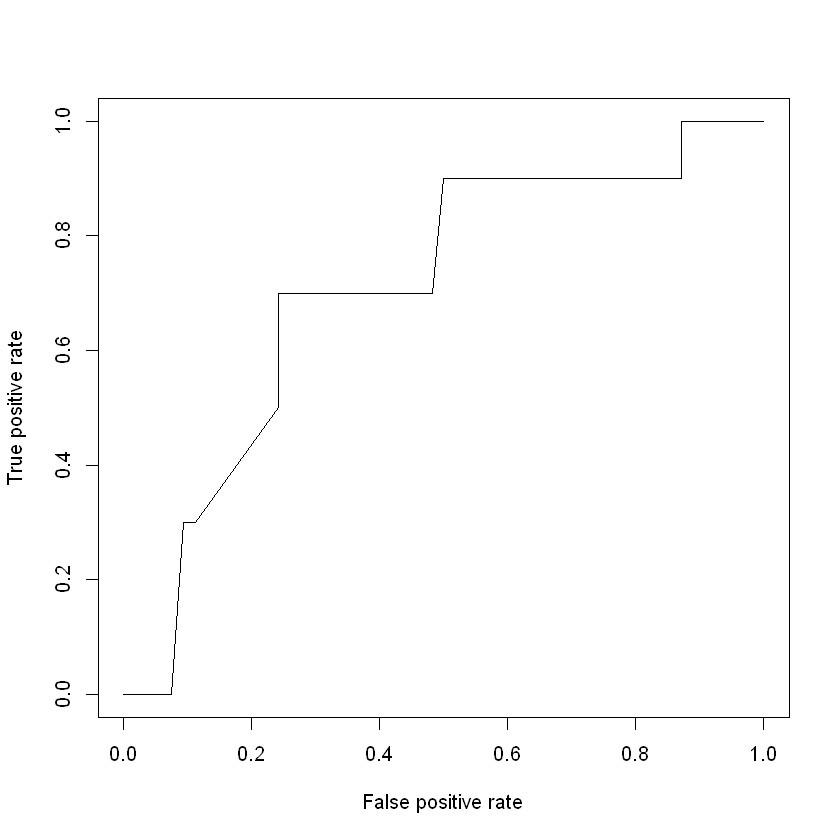

In [35]:
model <- glm(d3_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0864  -0.7380  -0.5158  -0.3512   2.3734  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)       -2.60790    1.01134  -2.579  0.00992 **
sexMale            0.82030    0.62418   1.314  0.18878   
definitionharmony  0.78838    0.67671   1.165  0.24401   
needharmony       -0.04400    0.52099  -0.084  0.93270   
purposecosmetic   -0.02849    0.80013  -0.036  0.97160   
purposeetc         1.02273    0.62802   1.629  0.10342   
interest          -0.03947    0.19894  -0.198  0.84272   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141.02  on 148  degrees of freedom
Residual deviance: 134.03  on 142  degrees of freedom
AIC: 148.03

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,141.0197,NA
sex,1,1.449405504,147,139.5703,0.2286234
definition,1,1.665670242,146,137.9046,0.1968395
need,1,0.006634699,145,137.8980,0.9350812
purpose,2,3.828849049,143,134.0691,0.1474266
interest,1,0.039354146,142,134.0298,0.8427487


[1] 0.35

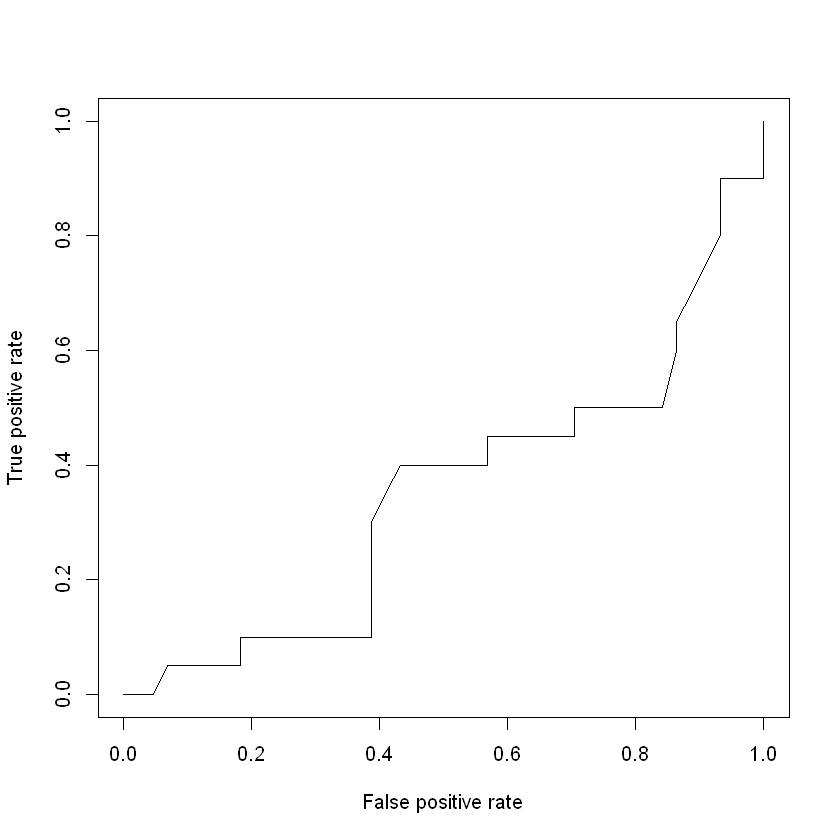

In [36]:
model <- glm(d3_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7282  -0.5406  -0.4755  -0.2979   2.6683  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.2764     1.1338  -2.008   0.0447 *
sexMale             0.3538     0.7088   0.499   0.6177  
definitionharmony  -0.6572     0.6856  -0.959   0.3378  
needharmony         0.2192     0.6424   0.341   0.7330  
purposecosmetic    -1.2271     1.1486  -1.068   0.2854  
purposeetc          0.3181     0.6766   0.470   0.6383  
interest            0.1368     0.2504   0.546   0.5848  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 105.79  on 148  degrees of freedom
Residual deviance: 101.19  on 142  degrees of freedom
AIC: 115.19

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,105.7870,NA
sex,1,0.1721220,147,105.6149,0.6782328
definition,1,1.0953503,146,104.5196,0.2952888
need,1,0.1745682,145,104.3450,0.6760834
purpose,2,2.8485896,143,101.4964,0.2406781
interest,1,0.3014883,142,101.1949,0.5829509


[1] 0.4391081

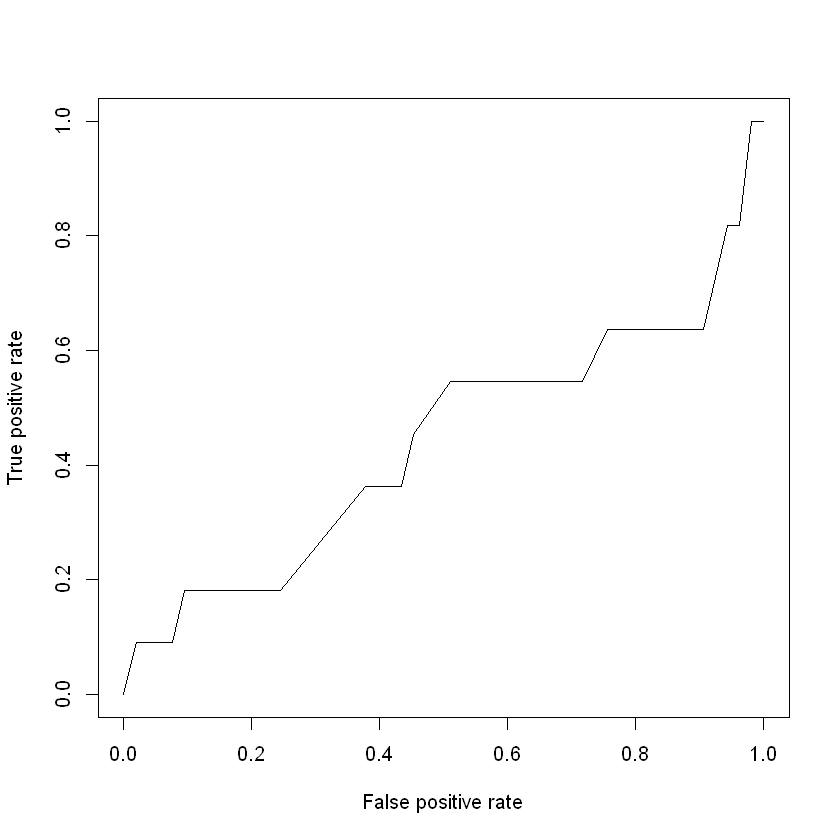

In [37]:
model <- glm(d3_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0962  -0.8305  -0.7208   1.3719   1.9498  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.60508    0.79973  -0.757    0.449
sexMale           -0.30115    0.51028  -0.590    0.555
definitionharmony  0.35791    0.52539   0.681    0.496
needharmony        0.27355    0.44505   0.615    0.539
purposecosmetic    0.16154    0.55494   0.291    0.771
purposeetc        -0.03196    0.50677  -0.063    0.950
interest          -0.22041    0.17607  -1.252    0.211

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 175.32  on 148  degrees of freedom
Residual deviance: 171.45  on 142  degrees of freedom
AIC: 185.45

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,148,175.3227,NA
sex,1,0.06863179,147,175.2541,0.7933394
definition,1,1.62244084,146,173.6317,0.2027518
need,1,0.37763673,145,173.2540,0.5388707
purpose,2,0.22078754,143,173.0332,0.8954815
interest,1,1.58293127,142,171.4503,0.2083390


[1] 0.3619792

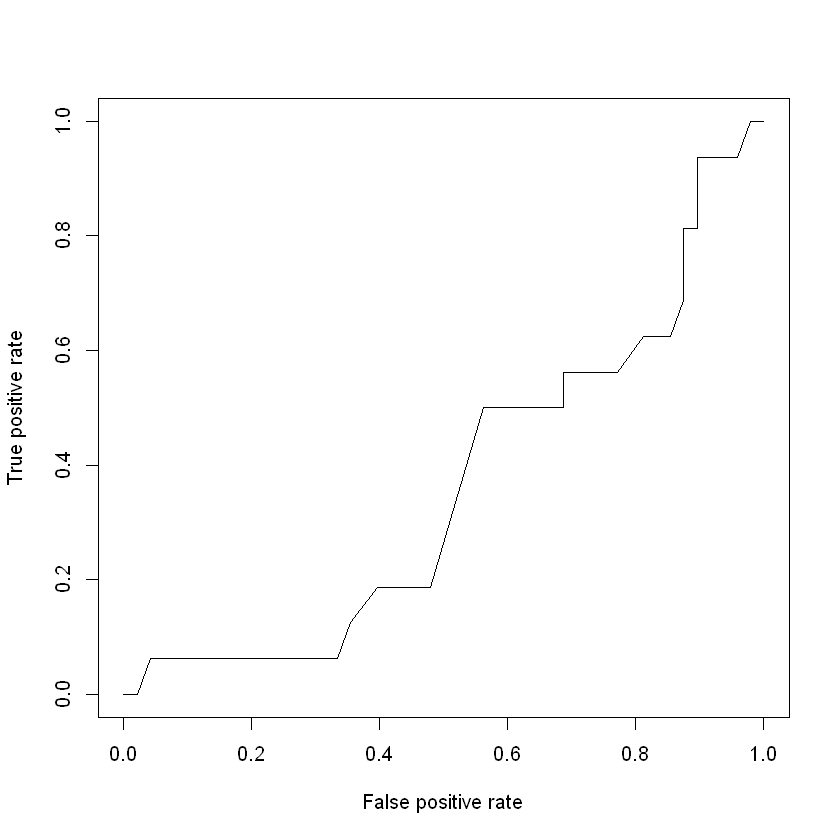

In [38]:
model <- glm(d3_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc